In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from PIL import Image
import os

In [104]:
img=mpimg.imread('/content/drive/MyDrive/pic_1.jpg').copy()

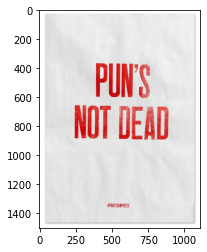

In [105]:
plt.imshow(img)

In [106]:
def remove_bg(input_img: np.ndarray) -> np.ndarray:
  img = input_img.copy()
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      if img[i][j].std() < 30:
        img[i][j][0] = 245
        img[i][j][1] = 245
        img[i][j][2] = 245
      else:
        img[i][j][0] = 200
        img[i][j][1] = 17
        img[i][j][2] = 11
  return img

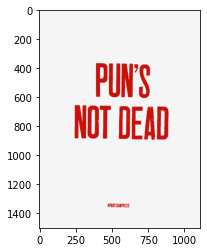

In [107]:
img = remove_bg(img)
plt.imshow(img)

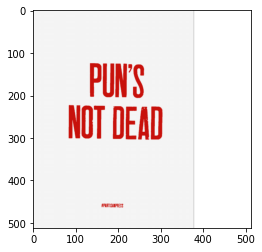

In [108]:
def transp_bg_and_resize(input_img: np.ndarray) -> np.ndarray:
  img = input_img.copy()
  a = 512/img.shape[0]
  x = int(img.shape[0]*a)
  y = int(img.shape[1]*a)
  img = resize(img, (x, y))

  blank = Image.new("RGBA",(512,512), (0,0,0,0))
  img = Image.fromarray((img * 255).astype(np.uint8))
  blank.paste(img, (0,0))
  return blank
 
plt.imshow(transp_bg_and_resize(imp))

In [ ]:
files = []

for i in os.listdir(dir):
	if i[-4::] == '.jpg':
		files += [i]

for file in files:
  img = mpimg.imread(file).copy()
  img = remove_bg(img)
  img = transp_bg_and_resize(img)
  img.save(f'result/{file[0:-4]}', 'png')

print('Done!')